# Meteorological Data Evaluation (ERDDAP)

## Data Description

Data is ingested to ERDDAP from ecoraid archive.  Timestamps have been converted to CF from EPIC, some history is maintained currently from global variables

Known issues with solar data for ***xxxx years***

In [100]:
#basic ingest and setup

from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YearLocator, WeekdayLocator, MonthLocator, 
                                DayLocator, HourLocator, DateFormatter)

'-----------------------------------------------------------------------------'

### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [101]:
server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

## M1

In [115]:
e = ERDDAP(server=server_url)
search_for = ['Meteorological', 'bsm1','-itae', '-alamo', '-fsu', '-cwwc', '-Gtspp']
df = pd.read_csv(e.get_search_url(response='csv', search_for=(' '.join(search_for))))

print(df['Dataset ID'].values)

from requests.exceptions import HTTPError

dfs = {}
for dataset_id in sorted(df['Dataset ID'].values):
    #print(dataset_id)
    if dataset_id in ['datasets_Met_19bsm2a_NRT','datasets_Met_18bsm2a_NRT','datasets_Met_17bsm2a_NRT','datasets_Met_16bsm2a_NRT','datasets_Met_15bsm2a_NRT']:
        continue
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        d.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

        dfs.update({dataset_id:df_m})
    except:
        pass

#merge dataframes
dfsorted = pd.concat(dfs.values())
dfsorted

['datasets_Met_95bsm1a_final']


,altitude,latitude,longitude,air_temperature,air_pressure,wind_direction,Teq_1800,battery_voltage,relative_humidity,solar_radiation,northward_wind,compass_direction,wind_speed,eastward_wind,timeseries_id
time (UTC),,,,,,,,,,,,,,,
1995-03-14 21:00:00+00:00,0.0,55.071667,164.51833,-8.3,1017.7,202.0,NaN,NaN,NaN,NaN,-8.34,NaN,9.0,-3.37,95bsm1a_wpak
1995-03-14 22:00:00+00:00,0.0,55.071667,164.51833,-8.4,1018.0,211.0,NaN,NaN,NaN,NaN,-6.86,NaN,8.0,-4.12,95bsm1a_wpak
1995-03-14 23:00:00+00:00,0.0,55.071667,164.51833,-8.2,1018.0,209.0,NaN,NaN,NaN,NaN,-7.43,NaN,8.5,-4.12,95bsm1a_wpak
1995-03-15 00:00:00+00:00,0.0,55.071667,164.51833,-8.4,1017.7,204.0,NaN,NaN,NaN,NaN,-6.85,NaN,7.5,-3.05,95bsm1a_wpak
1995-03-15 01:00:00+00:00,0.0,55.071667,164.51833,-8.4,1017.5,210.0,NaN,NaN,NaN,NaN,-6.24,NaN,7.2,-3.60,95bsm1a_wpak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995-06-14 21:00:00+00:00,0.0,55.071667,164.51833,7.1,992.8,306.0,NaN,NaN,NaN,NaN,1.88,NaN,3.2,-2.59,95bsm1a_wpak
1995-06-14 22:00:00+00:00,0.0,55.071667,164.51833,8.4,992.7,304.0,NaN,NaN,NaN,NaN,2.91,NaN,5.2,-4.31,95bsm1a_wpak
1995-06-14 23:00:00+00:00,0.0,55.071667,164.51833,6.6,992.6,325.0,NaN,NaN,NaN,NaN,4.67,NaN,5.7,-3.27,95bsm1a_wpak


## M2

*** additional QC performed ***

Missing Data

In [102]:
e = ERDDAP(server=server_url)
search_for = ['Meteorological', 'bsm', '2','-itae', '-alamo', '-fsu', '-cwwc', '-Gtspp']
df = pd.read_csv(e.get_search_url(response='csv', search_for=(' '.join(search_for))))

print(df['Dataset ID'].values)

['datasets_Met_20bsm2a_NRT' 'datasets_Met_00bsm2a_final'
 'datasets_Met_04bsm2a_final' 'datasets_Met_05bsm2a_final'
 'datasets_Met_06bsm2a_final' 'datasets_Met_07bsm2a_final'
 'datasets_Met_08bsm2a_final' 'datasets_Met_09bsm2a_final'
 'datasets_Met_10bsm2a_final' 'datasets_Met_11bsm2a_final'
 'datasets_Met_13bsm2a_final' 'datasets_Met_14bsm2a_final'
 'datasets_Met_15bsm2a_final' 'datasets_Met_15bsm2a_NRT'
 'datasets_Met_16bsm2a_final' 'datasets_Met_16bsm2a_NRT'
 'datasets_Met_17bsm2a_final' 'datasets_Met_17bsm2a_NRT'
 'datasets_Met_18bsm2a_final' 'datasets_Met_18bsm2a_NRT'
 'datasets_Met_19bsm2a_NRT' 'datasets_Met_95bsm2a_final'
 'datasets_Met_96bsm2a_final' 'datasets_Met_97bsm2a_final'
 'datasets_Met_98bsm2a_final' 'datasets_Met_99bsm2a_final'
 'datasets_Met_95bsm1a_final' 'datasets_Met_95bsm3a_final'
 'datasets_Met_96bsm3a_final' 'datasets_Met_97bsm3a_final']


In [103]:
from requests.exceptions import HTTPError

dfs = {}
for dataset_id in sorted(df['Dataset ID'].values):
    #print(dataset_id)
    if dataset_id in ['datasets_Met_18bsm2a_NRT','datasets_Met_17bsm2a_NRT','datasets_Met_16bsm2a_NRT','datasets_Met_15bsm2a_NRT']:
        continue
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        d.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

        dfs.update({dataset_id:df_m})
    except:
        pass


In [104]:
#merge dataframes
dfsorted = pd.concat(dfs.values())
dfsorted

,altitude,latitude,longitude,air_temperature,air_pressure,wind_direction,Teq_1800,battery_voltage,relative_humidity,solar_radiation,northward_wind,compass_direction,wind_speed,eastward_wind,timeseries_id,azimuth
time (UTC),,,,,,,,,,,,,,,,
2000-04-25 01:00:00+00:00,0.0,56.8800,164.0582,-2.70,1017.7,172.00000,-0.3,14.90,NaN,3.060000e+02,-6.139662,116.0,6.200000,0.862873,00bsm2a_wpak,NaN
2000-04-25 02:00:00+00:00,0.0,56.8800,164.0582,-2.70,1017.9,189.00000,-0.4,14.90,NaN,1.292000e+02,-6.617512,164.0,6.700000,-1.048111,00bsm2a_wpak,NaN
2000-04-25 03:00:00+00:00,0.0,56.8800,164.0582,-2.40,1018.1,194.00000,-0.4,14.80,NaN,8.160000e+01,-5.821775,133.0,6.000000,-1.451531,00bsm2a_wpak,NaN
2000-04-25 04:00:00+00:00,0.0,56.8800,164.0582,-1.70,1018.2,189.00000,-0.4,14.90,NaN,5.440000e+01,-6.419974,123.0,6.500000,-1.016824,00bsm2a_wpak,NaN
2000-04-25 05:00:00+00:00,0.0,56.8800,164.0582,-1.80,1018.3,191.00000,-0.3,14.80,NaN,2.720000e+01,-7.067716,149.0,7.200000,-1.373825,00bsm2a_wpak,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-09-10 17:00:00+00:00,1.0,56.8757,164.0490,8.34,NaN,79.90894,NaN,13.20,79.83,3.851000e+02,0.630000,NaN,3.595622,3.540000,98bsm2a-and-b_amp,NaN
1998-09-10 18:00:00+00:00,1.0,56.8757,164.0490,8.07,NaN,79.91937,NaN,13.20,81.44,1.406000e+02,0.480000,NaN,2.742335,2.700000,98bsm2a-and-b_amp,NaN
1998-09-10 19:00:00+00:00,1.0,56.8757,164.0490,7.91,NaN,79.88605,NaN,13.20,84.31,6.020000e+01,0.330000,NaN,1.879202,1.850000,98bsm2a-and-b_amp,NaN


(728049.0, 737425.0)

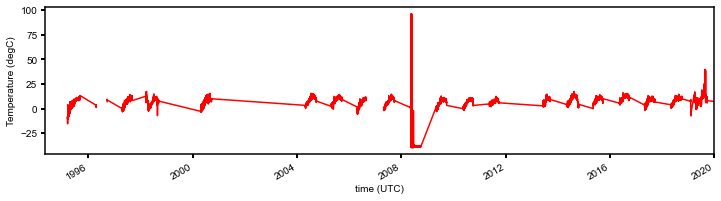

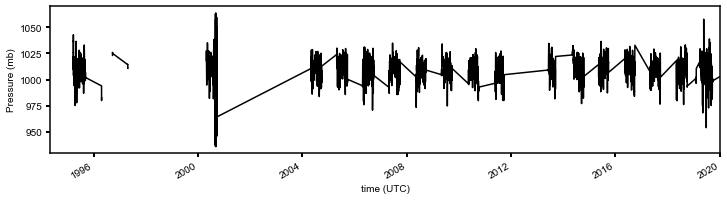

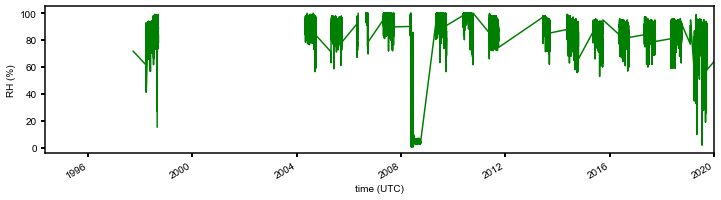

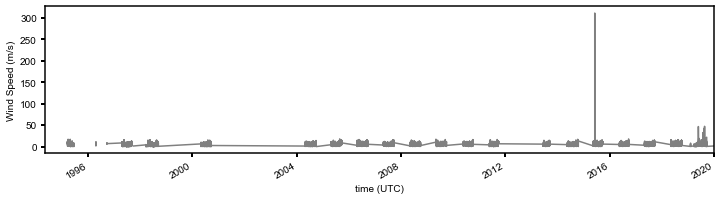

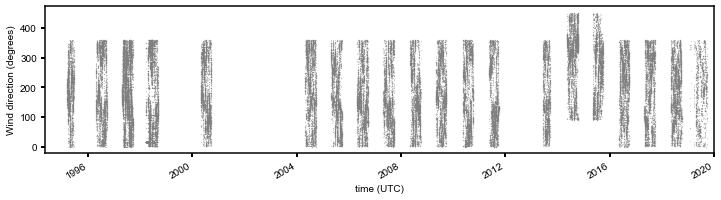

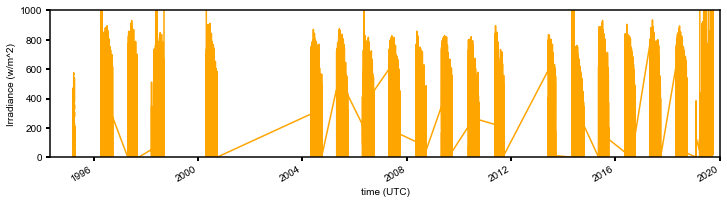

In [105]:
#matplotlib plots

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.air_temperature.plot(ax=ax,color='r')
plt.ylabel('Temperature (degC)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.air_pressure.plot(ax=ax,color='k')
plt.ylabel('Pressure (mb)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.relative_humidity.plot(ax=ax,color='g')
plt.ylabel('RH (%)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.wind_speed.plot(ax=ax,color='grey')
plt.ylabel('Wind Speed (m/s)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.wind_direction.plot(ax=ax,markersize=.25,style='.',
                             color='grey')
plt.ylabel('Wind direction (degrees)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.solar_radiation.plot(ax=ax,
                             color='orange')
plt.ylabel('Irradiance (w/m^2)')
plt.ylim([0,1000])
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])



## M3

In [106]:
e = ERDDAP(server=server_url)
search_for = ['Meteorological', 'bsm3','-itae', '-alamo', '-fsu', '-cwwc', '-Gtspp']
df = pd.read_csv(e.get_search_url(response='csv', search_for=(' '.join(search_for))))

print(df['Dataset ID'].values)

['datasets_Met_95bsm3a_final' 'datasets_Met_96bsm3a_final'
 'datasets_Met_97bsm3a_final']


In [107]:
from requests.exceptions import HTTPError

dfs = {}
for dataset_id in sorted(df['Dataset ID'].values):
    #print(dataset_id)
    if dataset_id in ['datasets_Met_18bsm2a_NRT','datasets_Met_17bsm2a_NRT','datasets_Met_16bsm2a_NRT','datasets_Met_15bsm2a_NRT']:
        continue
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        d.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

        dfs.update({dataset_id:df_m})
    except:
        pass


In [108]:
#merge dataframes
dfsorted = pd.concat(dfs.values())
dfsorted

,altitude,latitude,longitude,air_temperature,air_pressure,wind_direction,Teq_1800,battery_voltage,relative_humidity,solar_radiation,northward_wind,compass_direction,wind_speed,eastward_wind,timeseries_id
time (UTC),,,,,,,,,,,,,,,
1995-03-14 23:00:00+00:00,0.0,56.04,166.38667,-10.0,1021.313,216.030090,NaN,NaN,NaN,372.000000,-5.054,NaN,6.249471,-3.676000,95bsm3a_wpak
1995-03-15 00:00:00+00:00,0.0,56.04,166.38667,-10.1,1020.656,214.624820,NaN,NaN,NaN,194.000000,-5.554,NaN,6.749381,-3.835000,95bsm3a_wpak
1995-03-15 01:00:00+00:00,0.0,56.04,166.38667,-9.8,1020.438,209.003720,NaN,NaN,NaN,178.000000,-6.122,NaN,6.999866,-3.394000,95bsm3a_wpak
1995-03-15 02:00:00+00:00,0.0,56.04,166.38667,-10.1,1020.281,217.435850,NaN,NaN,NaN,170.000000,-5.161,NaN,6.499717,-3.951000,95bsm3a_wpak
1995-03-15 03:00:00+00:00,0.0,56.04,166.38667,-10.1,1020.563,213.692500,NaN,NaN,NaN,114.333336,-5.385,NaN,6.472149,-3.590333,95bsm3a_wpak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-09-01 05:00:00+00:00,3.0,56.06,166.33167,10.0,1004.600,17.065247,NaN,NaN,NaN,52.000000,4.300,NaN,4.498044,1.320000,97bsm3a_wpak
1997-09-01 06:00:00+00:00,3.0,56.06,166.33167,8.9,1004.900,74.041504,NaN,NaN,NaN,3.000000,1.650,NaN,6.001283,5.770000,97bsm3a_wpak
1997-09-01 07:00:00+00:00,3.0,56.06,166.33167,9.1,1005.400,77.973330,NaN,NaN,NaN,0.000000,0.980,NaN,4.703233,4.600000,97bsm3a_wpak


(728049.0, 730486.0)

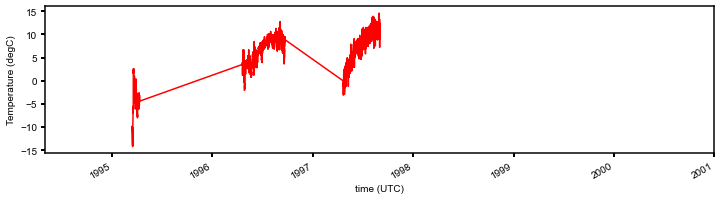

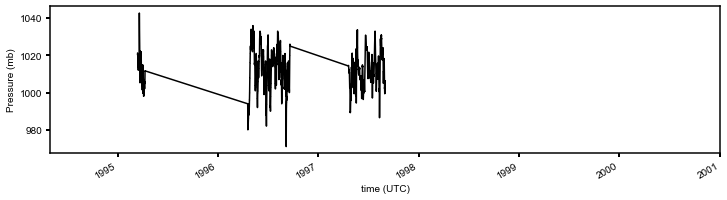

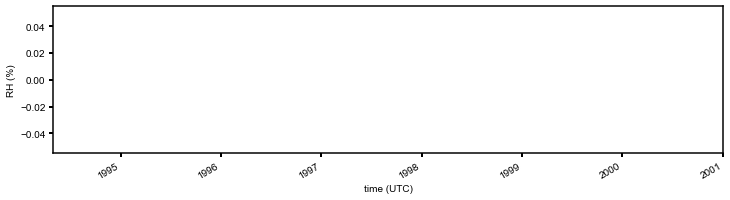

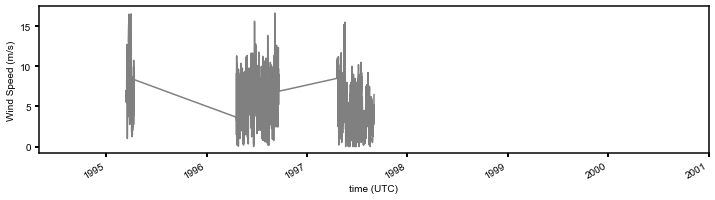

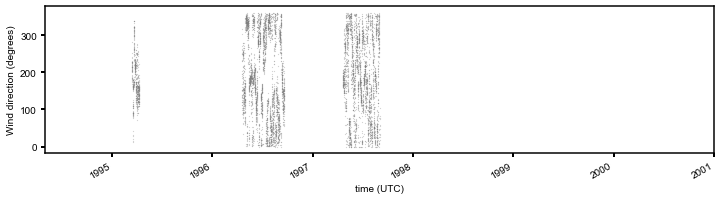

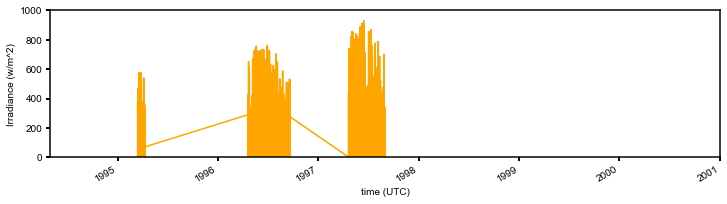

In [109]:
#matplotlib plots

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.air_temperature.plot(ax=ax,color='r')
plt.ylabel('Temperature (degC)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2001,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.air_pressure.plot(ax=ax,color='k')
plt.ylabel('Pressure (mb)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2001,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.relative_humidity.plot(ax=ax,color='g')
plt.ylabel('RH (%)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2001,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.wind_speed.plot(ax=ax,color='grey')
plt.ylabel('Wind Speed (m/s)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2001,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.wind_direction.plot(ax=ax,markersize=.25,style='.',
                             color='grey')
plt.ylabel('Wind direction (degrees)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2001,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.solar_radiation.plot(ax=ax,
                             color='orange')
plt.ylabel('Irradiance (w/m^2)')
plt.ylim([0,1000])
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2001,1,1)])


## GB-3 AND GB-4

In [110]:
e = ERDDAP(server=server_url)
search_for = ['Meteorological', 'gbm3','-itae', '-alamo', '-fsu', '-cwwc', '-Gtspp']
df = pd.read_csv(e.get_search_url(response='csv', search_for=(' '.join(search_for))))

print(df['Dataset ID'].values)

from requests.exceptions import HTTPError

dfs = {}
for dataset_id in sorted(df['Dataset ID'].values):
    #print(dataset_id)
    if dataset_id in ['datasets_Met_18bsm2a_NRT','datasets_Met_17bsm2a_NRT','datasets_Met_16bsm2a_NRT','datasets_Met_15bsm2a_NRT']:
        continue
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        d.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

        dfs.update({dataset_id:df_m})
    except:
        pass

#merge dataframes
dfsorted = pd.concat(dfs.values())
dfsorted

['datasets_Met_01gbm3a_final' 'datasets_Met_01gbm3b_final'
 'datasets_Met_03gbm3a_final' 'datasets_Met_04gbm3a_final']


,altitude,latitude,longitude,air_temperature,air_pressure,wind_direction,Teq_1800,battery_voltage,relative_humidity,solar_radiation,northward_wind,compass_direction,wind_speed,eastward_wind,timeseries_id
time (UTC),,,,,,,,,,,,,,,
2001-05-12 08:00:00+00:00,0.0,59.2737,148.9653,5.400000e+00,1.014000e+03,8.637146e+00,7.000000e+00,1.500000e+01,7.600000e+01,-1.000000e+00,7.900000e-01,1.983000e+02,7.990620e-01,0.120000,01gbm3a_wpak
2001-05-12 09:00:00+00:00,0.0,59.2737,148.9653,5.400000e+00,1.014000e+03,2.912402e+01,7.000000e+00,1.500000e+01,7.600000e+01,-2.000000e+00,7.000000e-01,3.320000e+02,8.013114e-01,0.390000,01gbm3a_wpak
2001-05-12 10:00:00+00:00,0.0,59.2737,148.9653,5.300000e+00,1.014000e+03,9.519446e+01,7.000000e+00,1.500000e+01,7.610000e+01,-2.000000e+00,-1.000000e-02,2.758000e+02,1.104536e-01,0.110000,01gbm3a_wpak
2001-05-12 11:00:00+00:00,0.0,59.2737,148.9653,5.300000e+00,1.013000e+03,1.095366e+02,7.000000e+00,1.500000e+01,7.910000e+01,-1.000000e+00,-1.100000e-01,2.710000e+02,3.289377e-01,0.310000,01gbm3a_wpak
2001-05-12 12:00:00+00:00,0.0,59.2737,148.9653,5.300000e+00,1.013000e+03,1.086157e+02,7.000000e+00,1.500000e+01,8.100000e+01,-1.000000e+00,-3.200000e-01,2.720000e+02,1.002447e+00,0.950000,01gbm3a_wpak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-10-08 12:00:00+00:00,0.0,59.3082,148.9959,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,-0.674519,04gbm3a_wpak
2004-10-08 13:00:00+00:00,0.0,59.3082,148.9959,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,-0.040225,04gbm3a_wpak
2004-10-08 14:00:00+00:00,0.0,59.3082,148.9959,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,9.969210e+36,0.254752,04gbm3a_wpak


(730241.0, 731947.0)

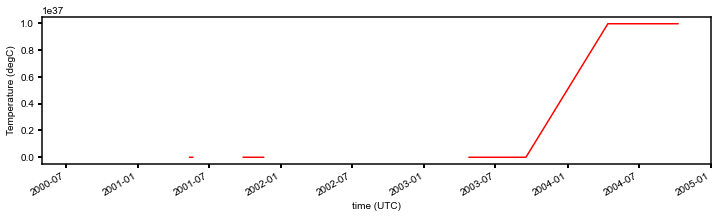

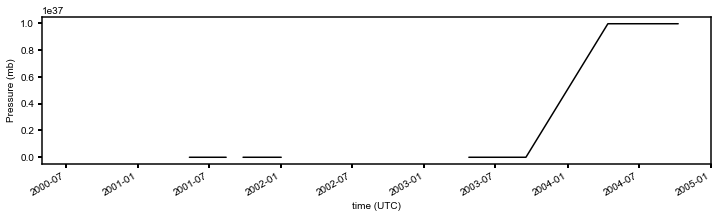

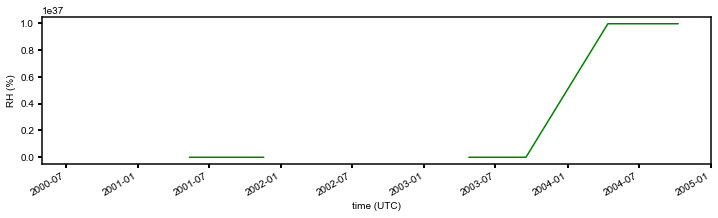

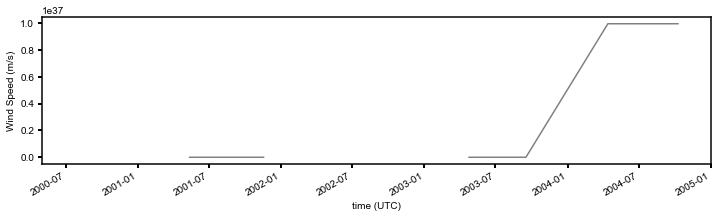

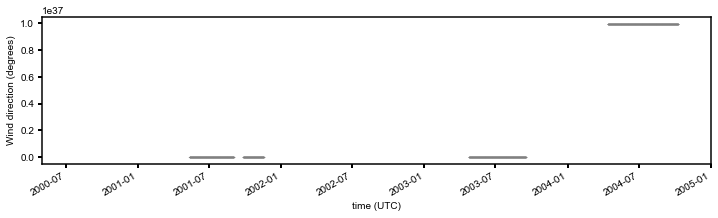

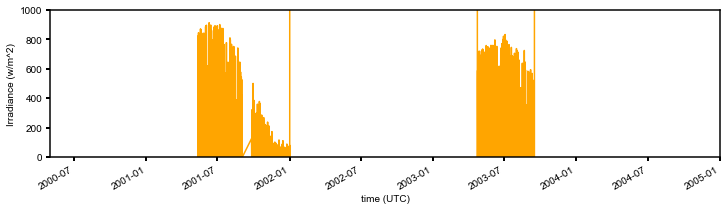

In [111]:
#matplotlib plots

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.air_temperature.plot(ax=ax,color='r')
plt.ylabel('Temperature (degC)')
plt.xlim([datetime.datetime(2000,5,1),datetime.datetime(2005,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.air_pressure.plot(ax=ax,color='k')
plt.ylabel('Pressure (mb)')
plt.xlim([datetime.datetime(2000,5,1),datetime.datetime(2005,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.relative_humidity.plot(ax=ax,color='g')
plt.ylabel('RH (%)')
plt.xlim([datetime.datetime(2000,5,1),datetime.datetime(2005,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.wind_speed.plot(ax=ax,color='grey')
plt.ylabel('Wind Speed (m/s)')
plt.xlim([datetime.datetime(2000,5,1),datetime.datetime(2005,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.wind_direction.plot(ax=ax,markersize=.25,style='.',
                             color='grey')
plt.ylabel('Wind direction (degrees)')
plt.xlim([datetime.datetime(2000,5,1),datetime.datetime(2005,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.solar_radiation.plot(ax=ax,
                             color='orange')
plt.ylabel('Irradiance (w/m^2)')
plt.ylim([0,1000])
plt.xlim([datetime.datetime(2000,5,1),datetime.datetime(2005,1,1)])


In [112]:
e = ERDDAP(server=server_url)
search_for = ['Meteorological', 'gbm4','-itae', '-alamo', '-fsu', '-cwwc', '-Gtspp']
df = pd.read_csv(e.get_search_url(response='csv', search_for=(' '.join(search_for))))

print(df['Dataset ID'].values)

from requests.exceptions import HTTPError

dfs = {}
for dataset_id in sorted(df['Dataset ID'].values):
    #print(dataset_id)
    if dataset_id in ['datasets_Met_18bsm2a_NRT','datasets_Met_17bsm2a_NRT','datasets_Met_16bsm2a_NRT','datasets_Met_15bsm2a_NRT']:
        continue
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        d.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

        dfs.update({dataset_id:df_m})
    except:
        pass

#merge dataframes
dfsorted = pd.concat(dfs.values())
dfsorted

HTTPError: 404 Client Error:  for url: http://downdraft.pmel.noaa.gov:8080/erddap/search/advanced.csv?page=1&itemsPerPage=1000&protocol=(ANY)&cdm_data_type=(ANY)&institution=(ANY)&ioos_category=(ANY)&keywords=(ANY)&long_name=(ANY)&standard_name=(ANY)&variableName=(ANY)&minLon=(ANY)&maxLon=(ANY)&minLat=(ANY)&maxLat=(ANY)&minTime=(ANY)&maxTime=(ANY)&searchFor=Meteorological+gbm4+-itae+-alamo+-fsu+-cwwc+-Gtspp